# This file contains function to plot decision region of model.

In [1]:
##mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import csv
import json
import os
import pandas as pd
import torch
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn.init as init

In [0]:
base_path = '/content/drive/My Drive/DL_exp/'

plot decision regions of model and model trained on data as scatter points.

##### Input:
* parameters : model's state dictionary
* scatter_data : d dimension input samples ((n X d) numpy array)
* scatter_label : input samples label ((n X 1) numpy array)
* layer : ith hidden layer (integer number)
* node : jth node in ith hidden layer (integer number)
 * layer values from [1....h] and node value according to that layer. 
 * For final output layer plot : layer value = h+1 and node value = -1.

##### Output:
* show output plot


torch.Size([2, 24])
torch.Size([24])
torch.Size([24, 15])
torch.Size([15])
torch.Size([15, 9])
torch.Size([9])
torch.Size([9, 2])
torch.Size([2])


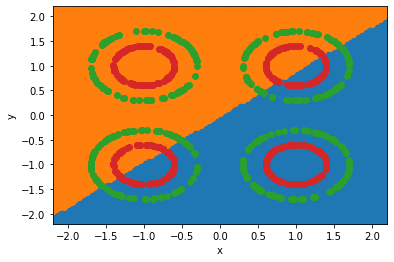

In [0]:
def decision_plot(parameters,scatter_data,scatter_label,layer,node):
  axis = np.arange(-2.2,2.2,0.05)
  X_data=[]
  for f in axis:
    for s in axis:
      X_data.append([f,s])
  X_data = np.array(X_data)
  y_data = np.zeros((len(X_data),1))

  for i in range(len(X_data)): 
    cur_input = X_data[i]
    l=0
    while l<layer:
      if l>0:
        cur_input = np.maximum(0,cur_output)
      weight = parameters['hidden.'+str(l)+'.weight'].cpu().numpy()
      bias = parameters['hidden.'+str(l)+'.bias'].cpu().numpy()
      cur_output = np.dot(cur_input,np.transpose(weight))+bias
      l+=1
    
    if node!=-1:
      if cur_output[node]>=0:
        y_data[i] = 1
      else:
        y_data[i] = 0
    else:
      probas = np.exp(cur_output) / np.sum(np.exp(cur_output), axis=0)
      y_data[i] = np.argmax(probas, 0)

  fig = plt.figure()
  plt.scatter(X_data[np.where(y_data == 1)[0],0],X_data[np.where(y_data == 1)[0],1])
  plt.scatter(X_data[np.where(y_data == 0)[0],0],X_data[np.where(y_data == 0)[0],1])
  plt.scatter(scatter_data[np.where(scatter_label == 1)[0],0],scatter_data[np.where(scatter_label == 1)[0],1])
  plt.scatter(scatter_data[np.where(scatter_label == 0)[0],0],scatter_data[np.where(scatter_label == 0)[0],1])
  plt.xlabel('x')
  plt.ylabel('y')
  axes = plt.gca()
  axes.set_xlim([-2.2,2.2])
  axes.set_ylim([-2.2,2.2])
  plt.show()
  # fig.savefig(base_path+'result/TF_graph/4fold_layer'+str(layer)+'_node'+str(node)+'.jpg')

In [0]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH)) 
# data = 

parameters = model.state_dict()
for key, value in parameters.items(): 
    print(key,parameters[key].t().shape)
layer = 1
node = 5
decision_plot(parameters,data[:,:-1],data[:,-1],layer,node)